In [1]:
%matplotlib inline

import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Animal_Shelter_Intake_and_Outcome.csv')

In [15]:
def create_datetime_series():
    # Load data
    df = pd.read_csv('data/Animal_Shelter_Intake_and_Outcome.csv')
    df['Intake Count'] = df['Intake Date'].map(df.groupby('Intake Date').size())
    
    # Isolate intake date column and convert to datetime dtype
    dft = df[['Intake Date', 'Intake Count']]
    dft['Intake Date'] = pd.to_datetime(df['Intake Date'])
    dft.sort_values(by='Intake Date', ascending=True, inplace=True)
    
    dft.drop_duplicates(subset="Intake Date", keep='last', inplace=True)
    
    dft.set_index('Intake Date', inplace=True)
    return dft

dft = create_datetime_series()
dft

,Intake Count
Intake Date,
2013-08-16,1
2013-08-17,1
2013-08-22,1
2013-08-24,1
2013-08-31,1
...,...
2020-09-08,12
2020-09-09,6
2020-09-10,16


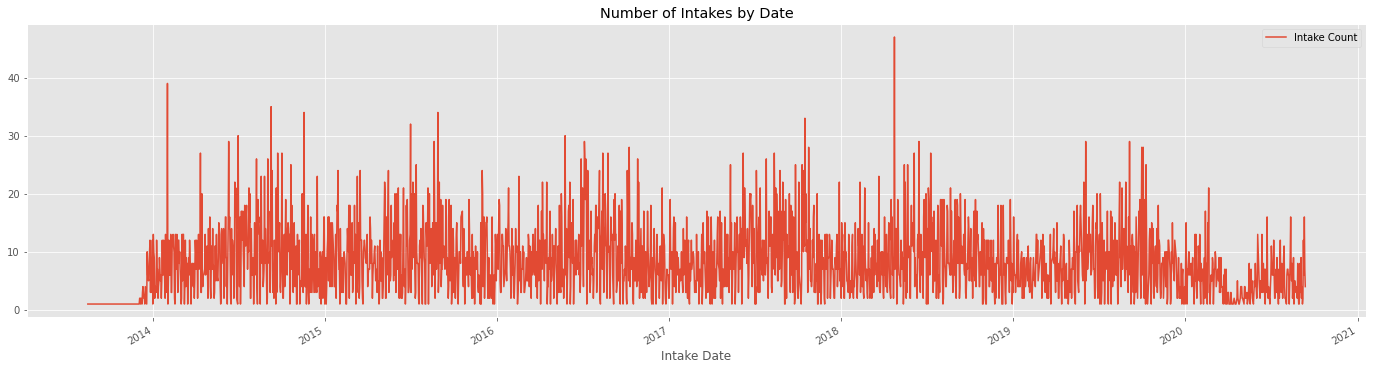

In [33]:

dft.plot(kind='line', figsize=(24,6), title='Number of Intakes by Date')

In [24]:
def make_design_matrix(arr):
    """Construct a design matrix from a numpy array, converting to a 2-d array
    and including an intercept term."""
    return sm.add_constant(arr.reshape(-1, 1), prepend=False)

def fit_linear_trend(series):
    """Fit a linear trend to a time series.  Return the fit trend as a numpy array."""
    X = make_design_matrix(np.arange(len(series)) + 1)
    linear_trend_ols = sm.OLS(series.values, X).fit()
    linear_trend = linear_trend_ols.predict(X)
    return linear_trend
fit_linear_trend(dft)

array([9.53565041, 9.53473703, 9.53382364, ..., 7.38189004, 7.38097665,
       7.38006327])

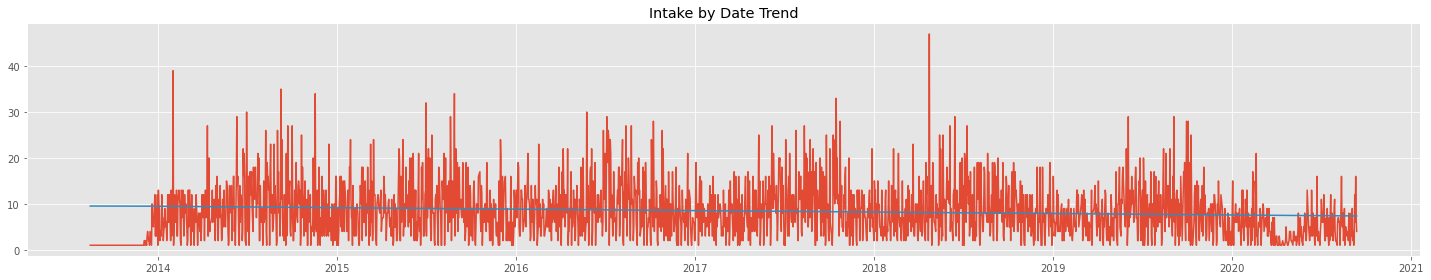

In [32]:
def plot_trend_data(ax, name, series):
    ax.plot(series.index.date, series)
    ax.set_title("Intake by Date Trend")
    #ax.set_ylim((0, 100))

def plot_linear_trend(ax, name, series):
    linear_trend = fit_linear_trend(series)
    plot_trend_data(ax, name, series)
    ax.plot(series.index.date, linear_trend)

fig, ax = plt.subplots(1, figsize=(20, 4))
plot_linear_trend(ax, 'python', dft)
plt.tight_layout()

Intake Count    0
dtype: int64